Projeto 2
Jonatas Ribeiro
Dataset: pacients vs different types of drugs

MEI - Aprendizagem computacional

Introdução

Projeto 2 da disciplina de Machine learning, aplicando conceitos de classificação em um dataset multi-class, com um total de 5 classes distintas.

O trabalho de análise de dados proposto neste projeto é baseado no cenário de um pesquisador de uma indústria farmacêutica, com dados de pacientes de diferentes características, porém, todos com o mesmo diagnóstico de determinada doença.

É suposto de se utilizar de técnicas de machine learning, para realizar uma predição do melhor remédio (classe) para o novo paciente (data test).

Objetivo 

O objetivo principal, no contexto do dataset escolhido é fazer uma análise dos dados, dividir o dataset entre grupo de treino e grupo para teste (validação), e verificar a assertividade do modelo em predições com o grupo de testes, após a aplicação de diferentes técnicas ensinadas em aula durante o semestre ou exploradas em material extra classe.

Implementação e análise dos dados

Utilizando variável de ambiente do Python 3, inicio minha análise com a importação de todos os pacotes/bibliotecas necessárias.

In [58]:
#%% Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
## IMPORTING MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Import do dataset e verificação inicial

Importante verificar a existencia de valores não-nulos nas diferentes colunas do dataset, assim como os tipos das variáveis e a quantidade de memória ocupada.

In [79]:
#%% Reading dataset

data_set_drug = pd.read_csv("./drug200.csv")
data_set_drug

#%% Reading the first 6 lines

data_set_drug.head()

#%% Checking for null/missing values

print("DATA SET INFO:", data_set_drug.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
DATA SET INFO: None


Variáveis categóricas

Neste dataset, verifica-se a presença de variáveis categóricas ordinais e não-ordinais. A diferença entre elas é que é possível organizar tais variáveis de forma crescente, utilizando um valor numérico que represente e faça sentido ao peso que a mesma representa. No caso de variáveis não ordinais, como exemplo, gênero, não é possível atribuir um valor maior ou menor, naturalmente a uma das duas opções (no caso do dataset).


In [80]:
#%% CATEGORICAL VARIABLES
data_set_drug.Drug.value_counts()

data_set_drug.Sex.value_counts()

data_set_drug.BP.value_counts()

data_set_drug.Cholesterol.value_counts()


Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

Variáveis Numéricas

Em conjunto as variáveis categóricas, neste conjunto de dados, também temos variáveis numéricas, como a idade e a razão de sódio e potássio no organismo.

Sendo assim, através do método describe() pode-se ter uma melhor descrição estatística do conjunto, incluindo contagem, média, variancia, valor máximo e mínimo, etc.

Em seguida, nas variáveis numéricas, aplica-se o método skew(), para se medir a assimetria da distribuição dos valores para cada categoria. Valores até o.5 podem ser considerados balanceados, e valores entre 0.5 e 1 podem indicar valores desbalanceados, conforme plots abaixo.



Age skewness:  0.03030835703000607


C:\Users\jonat\AppData\Local\Temp\ipykernel_10768\3887602943.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_set_drug['Age'])


<Axes: xlabel='Age', ylabel='Density'>

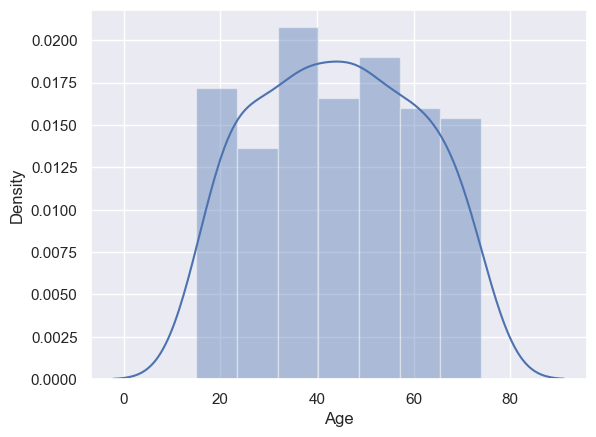

In [61]:
#%% NUMERICAL VARIABLES
# mean count, std, min, max and others using describe function
data_set_drug.describe()

skewAge = data_set_drug.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

sns.distplot(data_set_drug['Age'])
# 

Na to K skewness:  1.039341186028881


C:\Users\jonat\AppData\Local\Temp\ipykernel_10768\3181395387.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_set_drug['Na_to_K'])


<Axes: xlabel='Na_to_K', ylabel='Density'>

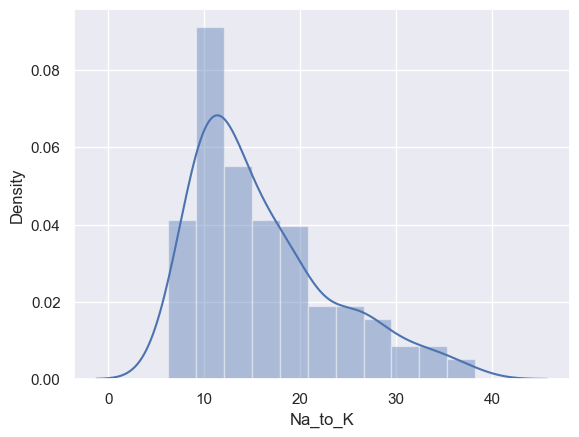

In [62]:
skewNatoK = data_set_drug.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)
sns.distplot(data_set_drug['Na_to_K'])

Verifiquei a distribuição de drogas em relação ao tamanho total do dataset.
Originalmente, fica claro que temos uma quantidade muito superior da droga Y (drugY). Isso pode afetar diretamente no Bias do resultado final, pois as classes não estão balanceadas.

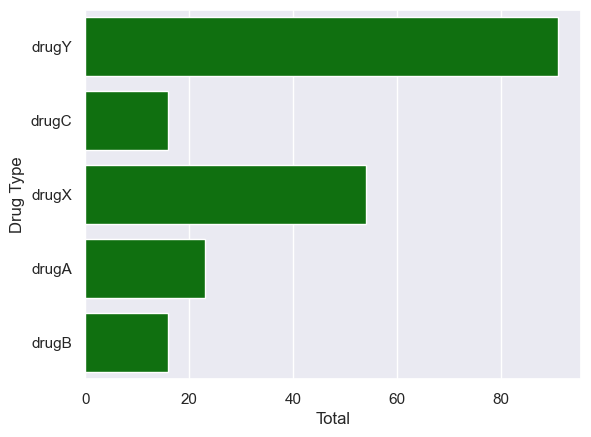

In [63]:
# %% DRUG TYPE DISTRIBUTION

sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=data_set_drug, color="green")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

A distribuição entre os gêneros Masculino e Feminino está balanceada, assim como a pressão sanguínea e o colesterol.

C:\Users\jonat\AppData\Local\Temp\ipykernel_10768\449310518.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=data_set_drug, palette=custom_palette)


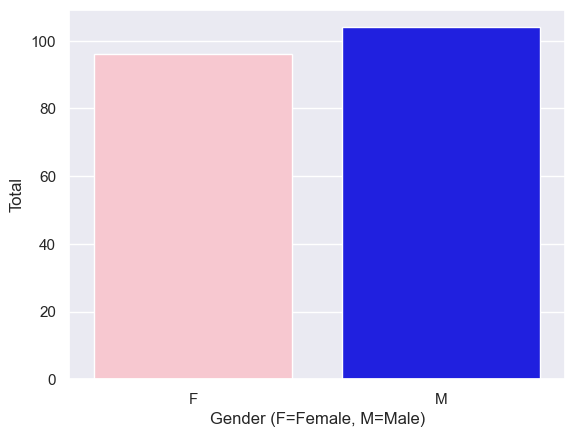

In [64]:
# %% GENDER DISTRIBUTION
sns.set_theme(style="darkgrid")
custom_palette = {"F": "pink", "M": "blue"}
sns.countplot(x="Sex", data=data_set_drug, palette=custom_palette)
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

C:\Users\jonat\AppData\Local\Temp\ipykernel_10768\888848603.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="BP", data=data_set_drug, palette=custom_palette)


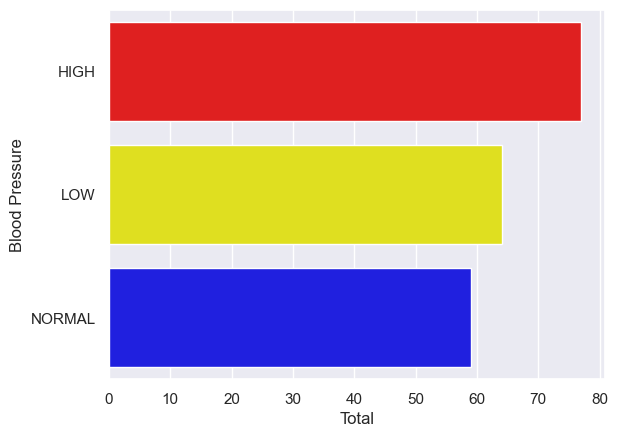

In [65]:
# %% BLOOD PRESSURE DISTRIBUTION
sns.set_theme(style="darkgrid")
custom_palette = {"HIGH": "red", "LOW": "Yellow", "NORMAL":"blue"}
sns.countplot(y="BP", data=data_set_drug, palette=custom_palette)
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

C:\Users\jonat\AppData\Local\Temp\ipykernel_10768\1986160711.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cholesterol", data=data_set_drug, palette=custom_palette)


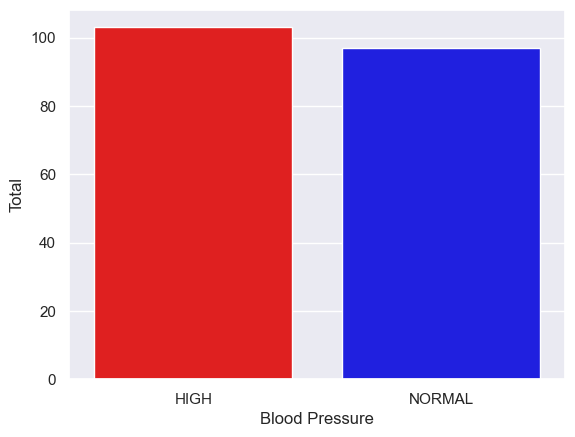

In [66]:
# %% Cholesterol DISTRIBUTION
sns.set_theme(style="darkgrid")
custom_palette = {"HIGH": "red", "LOW": "Yellow", "NORMAL":"blue"}

sns.countplot(x="Cholesterol", data=data_set_drug, palette=custom_palette)
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

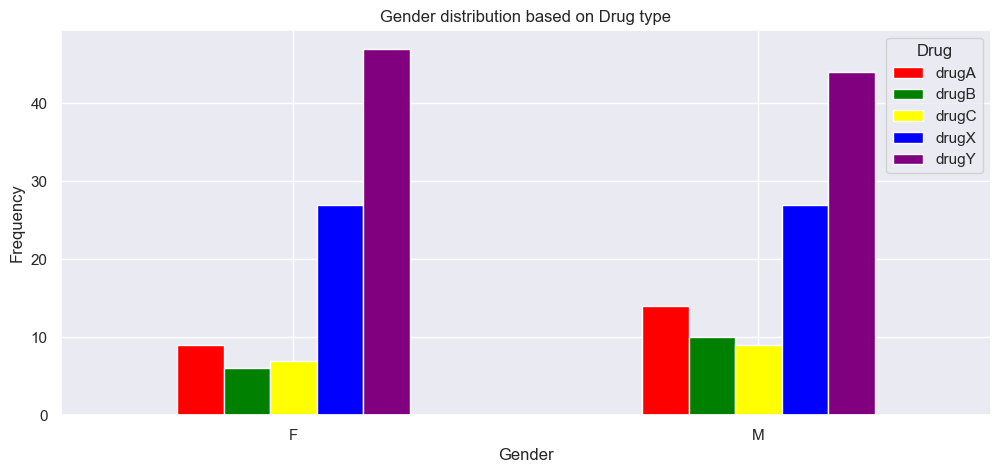

In [67]:
pd.crosstab(data_set_drug.Sex,data_set_drug.Drug).plot(kind="bar",figsize=(12,5),color=['red','green','yellow','blue','purple'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

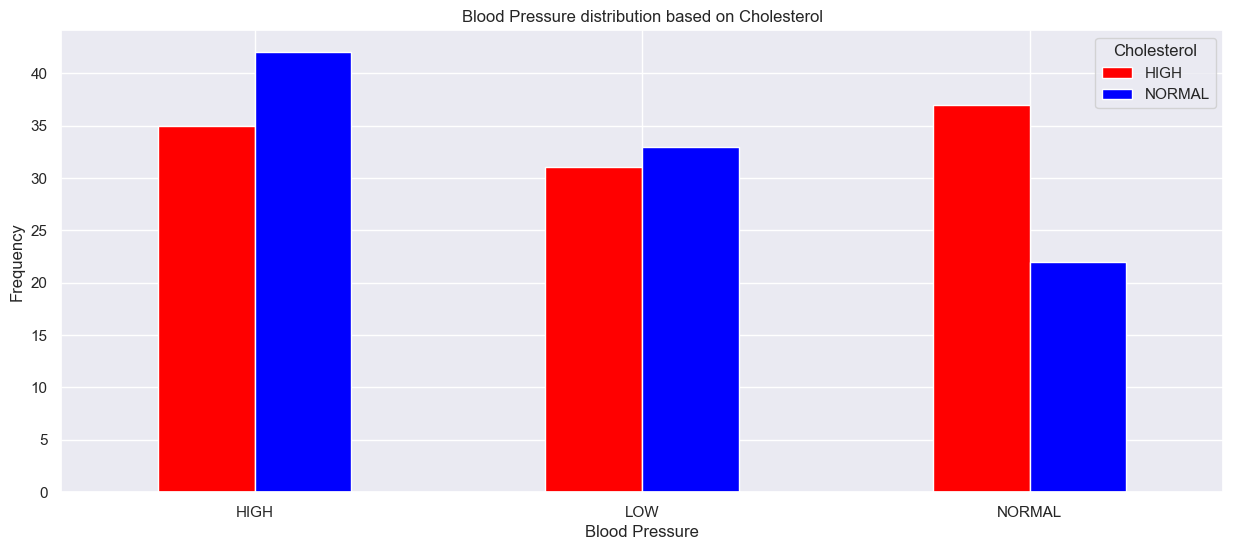

In [68]:
#%% Blood Pressure Distribution based on Cholesetrol
pd.crosstab(data_set_drug.BP,data_set_drug.Cholesterol).plot(kind="bar",figsize=(15,6),color=['red','blue'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

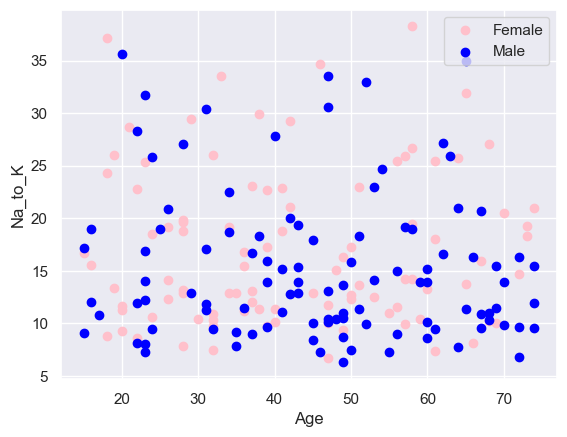

In [69]:
#%% Sodium to Potassium Distribution based on Gender and Age

plt.scatter(x=data_set_drug.Age[data_set_drug.Sex=='F'], y=data_set_drug.Na_to_K[(data_set_drug.Sex=='F')], c="Pink")
plt.scatter(x=data_set_drug.Age[data_set_drug.Sex=='M'], y=data_set_drug.Na_to_K[(data_set_drug.Sex=='M')], c="Blue")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

Preparação do DATASET

Nesta etapa, é realizada a preparação do dataset para o treino dos modelos (pré-processamento).

Para facilitar a visualização e consequente interpretação dos dados, separei as variáveis "Age" e "Na_to_K" em sub-intervalos definidos, e por sim, substituo a coluna original da variável por uma nova coluna, definida em sub-intervalos.

In [70]:
## AGE CATEGORY
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
data_set_drug['Age_binned'] = pd.cut(data_set_drug['Age'], bins=bin_age, labels=category_age)
data_set_drug = data_set_drug.drop(['Age'], axis = 1)

In [71]:
#%% Na_to_K
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
data_set_drug['Na_to_K_binned'] = pd.cut(data_set_drug['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
data_set_drug = data_set_drug.drop(['Na_to_K'], axis = 1)

Divisão do dataset no segmento de treino e de testes, na proporção de 20% para testes e 80% para treino.

In [72]:
X = data_set_drug.drop(["Drug"], axis=1)
y = data_set_drug["Drug"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

Feature Engineering
- Hot Encoding:
Utilizei hot encoding para as variáveis categóricas. Este, por sua vez, é um método de conversão de variáveis categoricas em uma matriz binária. Cada linha da matriz corresponde a uma amostra, e cada coluna, corresponde a uma categoria. Este método é util quando temos variáveis categóricas não-ordinais (ex.:gênero).

- Label Enconding:
Atribuição de um valor inteiro a cada variável. Método útil quando da existência de variáveis categóricas ordinais, que seguem uma ordem ou ranking. Um bom exemplo é a pressão sanguínea, que possui valores LOW, NORMAL e HIGH (0,1,2).

Neste projeto, adicionei uma função específica para aplicação de métodos de pré-processamento, com o objetivo de avaliar a diferença nos resultados obtidos.



In [73]:
def apply_feature_eng(method, X_train_dataset, X_test_dataset):
    if(method == "hot"):
        X_train = pd.get_dummies(X_train_dataset)
        X_test = pd.get_dummies(X_test_dataset)
    else:
        label_enc = LabelEncoder()
        for col in X_train_dataset.select_dtypes(include='O').columns:  # Considering only the categorical columns in the training set
            # Label encoding each column in the training set
            X_train_dataset[col] = label_enc.fit_transform(X_train_dataset[col])
            # Transforming the testing set based on the label encoding fitted on the training set
            X_test_dataset[col] = label_enc.transform(X_test_dataset[col])
        X_train = X_train_dataset
        X_test = X_test_dataset
        
    return X_train, X_test

C:\Users\jonat\AppData\Local\Temp\ipykernel_10768\2296463255.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y_train, data=data_set_drug, palette=custom_palette)


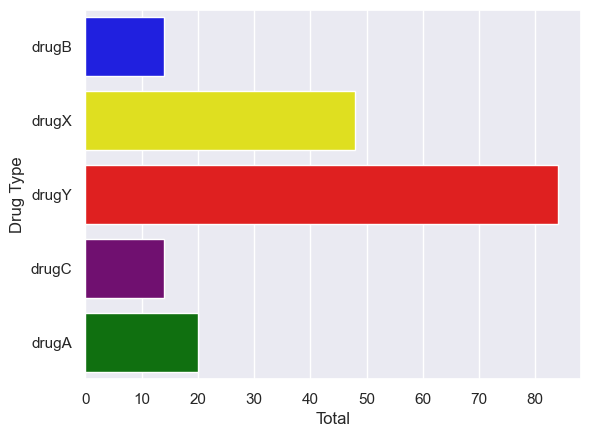

In [74]:

method = "hot" ##Option 1
# method = "label" ##Option 2
X_train , X_test = apply_feature_eng(method, X_train, X_test)

X_train.head()

X_test.head()

sns.set_theme(style="darkgrid")
color=['red','green','yellow','blue','purple']
custom_palette = {"drugY":"red","drugA":"green","drugX":"yellow","drugB":"blue","drugC":"purple"}
sns.countplot(y=y_train, data=data_set_drug, palette=custom_palette)
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

Modelos utilizados para a análise do dataset

- Logistic Regression
- K Neighbours
- SVM
- Decision Tree
- Ramdom Forest

Pipeline e Grid-Search


In [75]:
# Define the models and their corresponding parameters
models = {
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', max_iter=5000),
        'params': {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__penalty': ['l1', 'l2'],
            'classifier__fit_intercept': [True, False],  
            'classifier__class_weight': [None, 'balanced'],
        }
    },
    'k_neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7, 9],
            'classifier__weights': ['uniform', 'distance'],  # Additional parameter
            'classifier__p': [1, 2]  # Additional parameter
        }
    },
    'svm': {
        'model': SVC(),
        'params': {
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__kernel': ['linear', 'rbf'],
            'classifier__gamma': ['scale', 'auto'],  # Additional parameter
            'classifier__degree': [2, 3, 4] 
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [3, 5, 7, 9],
            'classifier__min_samples_split': [2, 5, 10],  # Additional parameter
            'classifier__min_samples_leaf': [1, 2, 4],  # Additional parameter
            'classifier__criterion': ['gini', 'entropy']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [3, 5, 7],
            'classifier__min_samples_split': [2, 5, 10],  # Additional parameter
            'classifier__min_samples_leaf': [1, 2, 4],  # Additional parameter
            'classifier__criterion': ['gini', 'entropy'] 
        }
    }
}

# Create an empty dictionary to store the results for each model
results = {}

# Loop through the models and perform grid search for each model
for model_name, mp in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', mp['model'])
    ])
    grid_search = GridSearchCV(pipeline, mp['params'], cv=5)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    results[model_name] = {'model': grid_search, 'accuracy': accuracy}

# Print the results for each model
model_comparison = []
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(classification_report(y_test, result['model'].predict(X_test)))
    print(confusion_matrix(y_test, result['model'].predict(X_test)))
    print(f"{model_name} accuracy is: {result['accuracy']*100:.2f}%")
    print(f"Best hyperparameters for {model_name}: {result['model'].best_params_}")
    print("\n")
    model_comparison.append({'Model': model_name, 'Accuracy': result['accuracy']*100})

Model: logistic_regression
              precision    recall  f1-score   support

       drugA       1.00      0.67      0.80         3
       drugB       0.67      1.00      0.80         2
       drugC       0.50      1.00      0.67         2
       drugX       1.00      1.00      1.00         6
       drugY       1.00      0.71      0.83         7

    accuracy                           0.85        20
   macro avg       0.83      0.88      0.82        20
weighted avg       0.92      0.85      0.86        20

[[2 0 1 0 0]
 [0 2 0 0 0]
 [0 0 2 0 0]
 [0 0 0 6 0]
 [0 1 1 0 5]]
logistic_regression accuracy is: 85.00%
Best hyperparameters for logistic_regression: {'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__fit_intercept': True, 'classifier__penalty': 'l2'}


Model: k_neighbors
              precision    recall  f1-score   support

       drugA       0.75      1.00      0.86         3
       drugB       0.00      0.00      0.00         2
       drugC       0.

c:\Users\jonat\OneDrive\Documents\DEV\MESTRADO\MSc-IPT-Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jonat\OneDrive\Documents\DEV\MESTRADO\MSc-IPT-Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jonat\OneDrive\Documents\DEV\MESTRADO\MSc-IPT-Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

Comparação entre modelos e resultados de assertividade

Abaixo, pode-se verificar os resultados obtidos entre os modelos, armazenadas na variável model_comparison, com seus respectivos f1-scores.

In [76]:
# Initialize an empty list to store the model names and accuracies
df_model_comparison = pd.DataFrame(model_comparison)

# Print the model comparison dataframe
print(df_model_comparison)

                 Model  Accuracy
0  logistic_regression      85.0
1          k_neighbors      75.0
2                  svm      90.0
3        decision_tree      80.0
4        random_forest      85.0


Considerações finais

O primeiro ponto a se destacar é o desempenho do modelo logistic_regression para datasets menores. O que indica a necessidade de maior representatividade nos dados, pois atualmente, sem um balanceamento prévio nas classes de treino, pode induzir a um bias do modelo. Uma quantidade maior de amostras também ajuda a verificar o quão forte são as correlações entre as variáveis.

Ao mudar a proporção de dados de treino e dados de validação para 90% - 10%, verifica-se um aumento no f1 score em praticamente todos os modelos. Isso demonstra a necessidade de maior diversidade de informações na etapa de treino (fit), conforme comparação abaixo.


Para o modelo com melhor resultado, os hiper parâmetros escolhidos no grid Search foram:

```python
{
    'classifier__C': 0.1, 
    'classifier__degree': 2, 
    'classifier__gamma': 'scale', 
    'classifier__kernel': 'linear'
}
```



Proporção 80% - 20%

- hot encodding:
```python
                 Model  Accuracy
0  logistic_regression      82.5
1          k_neighbors      72.5
2                  svm      75.0
3        decision_tree      72.5
4        random_forest      80.0
```



Proporção 90% - 10%

- hot encodding:

```python
                 Model  Accuracy
0  logistic_regression      85.0
1          k_neighbors      75.0
2                  svm      90.0
3        decision_tree      80.0
4        random_forest      85.0
```
